# `snell_example_optimized.ipynb`

### Notebook showing the results of a compromise between speed and result quality:
1) Super sample 16x

2) Average over 5 seperate stochastically sampled images

In [1]:
import snell
import matplotlib.pyplot as plt
import numpy as np
import tifffile

from skimage.transform import downscale_local_mean as dsm
from skimage.transform import rescale

%matplotlib notebook
%load_ext autoreload
%autoreload

#### Initialize display variables using class constructor
Assuming input images are square, 'dispres' should be the width of expected input images 

In [2]:
display_stochastic = snell.snell(config = 'flat_stochastic', dispres = 1000, 
                                 dispcm = 2, ddisp = 1, dadw = 10, stoch_range=2,num_stochastic=5)

#### Create spatial lookup table for this virtual display configuration

In [3]:
display_stochastic.make_display()

## Load in and transform some example images

#### Gratings:

In [4]:
OMR_air = tifffile.imread('./examples/example_grating_dsm.tif')

OMR_snell_stochastic2 = display_stochastic.transform_images_loop(OMR_air,smooth=False)

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


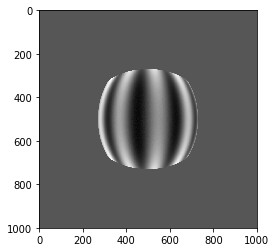

In [5]:
plt.figure()
plt.imshow(OMR_snell_stochastic2,cmap='gray')

# Go backwards

In [6]:
display_stochastic.init_inverse_transform_loop()

Creating inverse lookup tables...
1/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX ]end
2/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX ]end
3/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX ]end
4/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX ]end
5/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX ]end


In [7]:
check_air = tifffile.imread('examples/example_check_inwindow_dsm.tif')

In [8]:
inverse = display_stochastic.inverse_transform_image_loop(check_air,smooth=False)

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(3999, 3999)
inverting image...
1/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXX ]end
2/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXX ]end
3/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXX ]end
4/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXX ]end
5/5 ...
start[XXXXXXXXXXXXXXXXXXXXXXXX ]end
Done.
Calculating reconstruction error...
mean absolute error (proportion of target):0.19579101723772388


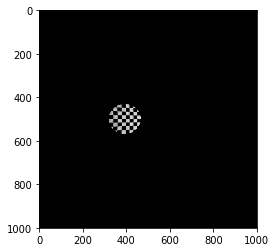

In [9]:
plt.figure()
plt.imshow(inverse,cmap='gray')

### Code below is under development, please ignore

In [21]:
def save_inverses(inv,hf_file):
    for i in range(len(inv)):
        hf_file.create_dataset('inverse_{}'.format(i),data=str(display_stochastic.inverses[i]))

In [14]:
def read_inverses(fn):
    inverses = []
    hf = h5py.File(fn,'r')
    for key in hf.keys():
        inverses.append(ast.literal_eval(str(np.array(hf[key]))))
    hf.close()
    return inverses